X.Shape: (26, 2)


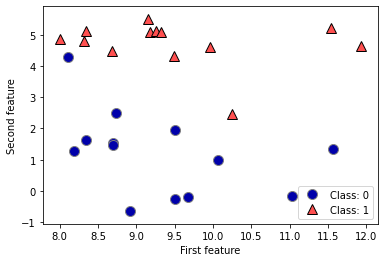

In [1]:

%matplotlib inline
from preamble import *
# データセットの生成
X, y = mglearn.datasets.make_forge()

# プロット
# discrete_scatter 第三引数に各データに対するラベルを指定することにより、そのラベルに応じてMarkerの種類や色を変えて散布図を描写する
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# legend 凡例を表示する
plt.legend(["Class: 0", "Class: 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.Shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

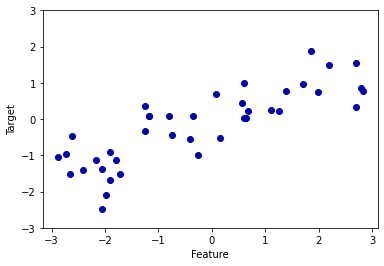

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:

# 癌のデータによるサンプル

from sklearn.datasets import load_breast_cancer
# Bunch型の変数
cancer = load_breast_cancer()
print("cancer.keys(): \n {}".format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [5]:
# np.bincount 値の出現回数
print("Sample of count per class: {}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample of count per class: {'malignant': 212, 'benign': 357}


In [6]:
print("Feature names: \n {}".format(cancer.feature_names))

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape: {}".format(boston.data.shape))

Data Shape: (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


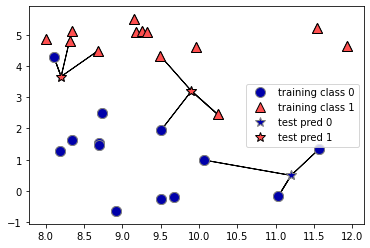

In [9]:
# k-最近傍法
# 訓練データに含まれる点の中で予測したいデータポイントにもっとも近い物だけをみる
# k個の近傍点を用いて予測を行う、k > 1の時は投票でラベルを決定する
# アルゴリズムとしては、もっとも単純なもの
mglearn.plots.plot_knn_classification(n_neighbors=1)

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# 訓練データを用いてk-最近傍法を実践する

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# データを訓練/テストに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)


In [12]:
# モデルの適用
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


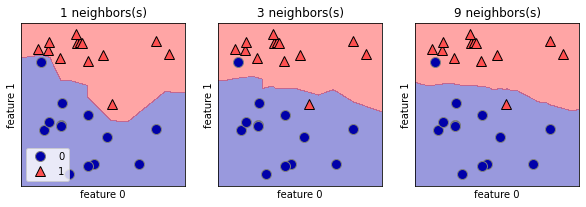

In [15]:
# subplot 現在の図に軸を追加するか、既存の軸を取得する
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

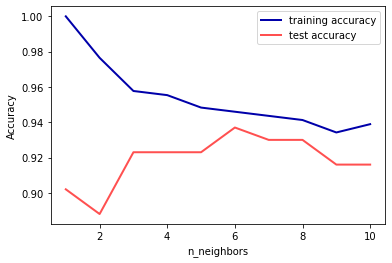

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1〜10まで検証する
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練データの精度を保存
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を保存
    test_accuracy.append(clf.score(X_test, y_test))

# それぞれを可視化することで最適解を検討する
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

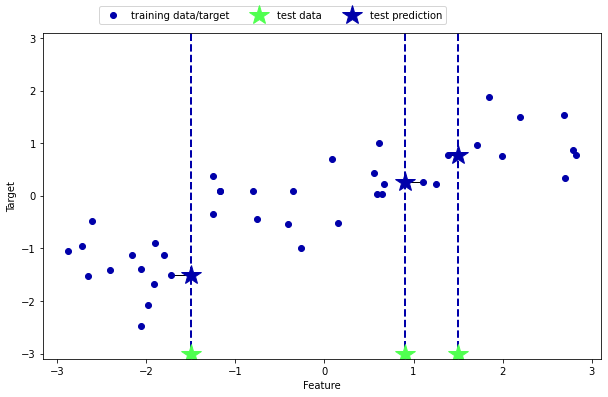

In [17]:
# k-最近傍法 回帰パターン
mglearn.plots.plot_knn_regression(n_neighbors=1)

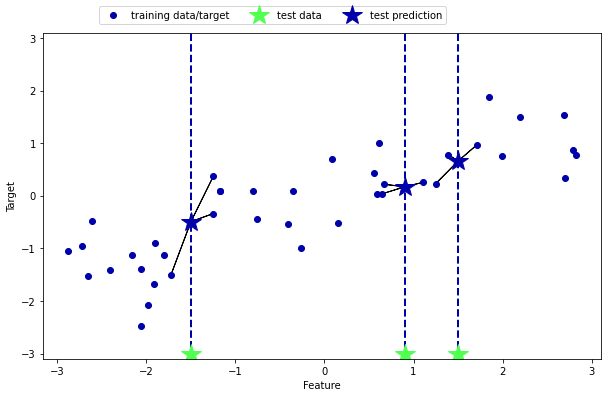

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#  waveのデータセットを訓練データセットとテストセットに分類する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するようにインスタンスを生成する
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
print("Test set predictions: \n {}".format(reg.predict(X_test)))

Test set predictions: 
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [ ]:
# R^2 スコアで予測の正確さを計測する
# 決定係数とも呼ばれる
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))



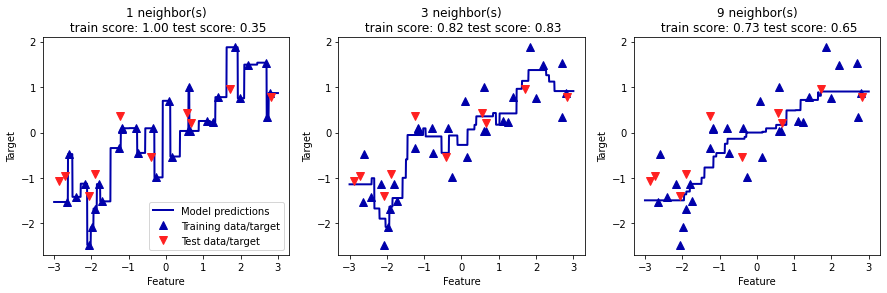

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3まで1000個のデータポイントを生成する
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1,3,9の近傍点を用いる
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [ ]:
# k-最近傍法まとめ
# 重要なパラメータは「近傍点」と「データポイント間の距離測度」、実用的な近傍点は3から5であることがほとんどである
# メリットとして理解しやすいアルゴリズムであることと、パラメータを細かく調整しなくても精度が高いことが多い
# デメリットとしてデータ数が多い場合に予測が遅くなる。特徴量が多い場合に機能しないことが多い。
# 特徴量がほとんど0になるような「疎なデータセット」な場合も同様に性能が悪くなる

In [ ]:
# 線形モデル